<a href="https://colab.research.google.com/github/Kimbaeda/youngwoo/blob/main/9%EC%9D%BC%EC%B0%A8_%EB%A7%88%EC%A7%80%EB%A7%89%EC%8B%A4%EC%8A%B5(BILSTM_%2B_CRF_%EA%B0%9C%EC%B2%B4%EB%AA%85%EC%9D%B8%EC%8B%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

출처 : https://wikidocs.net/34156

## BILSTM + CRF 개체명인식

In [1]:
!pip install tensorflow==1.14.0
!pip install keras==2.2.4
!pip install tensorflow-gpu==1.14.0

     |████████████████████████████████| 109.3MB 55kB/s 
     |████████████████████████████████| 3.2MB 31.2MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 491kB 29.4MB/s 
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.14.0 which is incompatible.
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.0:
      Successfully uninstalled tensorflow-2.5.0
     |████████████████████████████████| 317kB 5.2MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 377.1MB 42kB/s 


In [2]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-3ds2ajce
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-3ds2ajce
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp37-none-any.whl size=101078 sha256=052f3327a8109a2ebdc6c11802ca38e39fe09c0a74b3366f88d2aa4bd3da35fe
  Stored in directory: /tmp/pip-ephem-wheel-cache-4sjhsw57/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/자연어처리/dataset/ner_dataset.csv', encoding="latin1")

In [5]:
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Sentence #  47959 non-null    object
 1   Word        1048575 non-null  object
 2   POS         1048575 non-null  object
 3   Tag         1048575 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB


In [7]:
data.isna().sum().sum()

1000616

In [8]:
data.isna().sum()

Sentence #    1000616
Word                0
POS                 0
Tag                 0
dtype: int64

In [9]:
print('sentence #열의 중복을 제거한 값의 갯수 : {}'.format(data['Sentence #'].nunique()))
print('word열의 중복을 제거한 값의 갯수 : {}'.format(data.Word.nunique()))
print('Tag열의 중복을 제거한 값의 갯수 : {}'.format(data.Tag.nunique()))

sentence #열의 중복을 제거한 값의 갯수 : 47959
word열의 중복을 제거한 값의 갯수 : 35178
Tag열의 중복을 제거한 값의 갯수 : 17


In [10]:
print('Tag열의 각각의 값의 갯수 카운트')
print("==============================")
print(data.groupby('Tag').size().reset_index(name='count'))

Tag열의 각각의 값의 갯수 카운트
      Tag   count
0   B-art     402
1   B-eve     308
2   B-geo   37644
3   B-gpe   15870
4   B-nat     201
5   B-org   20143
6   B-per   16990
7   B-tim   20333
8   I-art     297
9   I-eve     253
10  I-geo    7414
11  I-gpe     198
12  I-nat      51
13  I-org   16784
14  I-per   17251
15  I-tim    6528
16      O  887908


In [11]:
# null 제거
data = data.fillna(method='ffill')

In [12]:
print(data.tail())

              Sentence #       Word  POS Tag
1048570  Sentence: 47959       they  PRP   O
1048571  Sentence: 47959  responded  VBD   O
1048572  Sentence: 47959         to   TO   O
1048573  Sentence: 47959        the   DT   O
1048574  Sentence: 47959     attack   NN   O


In [13]:
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [14]:
data.isna().sum().sum()

0

In [15]:
# 소문자화
data['Word'] = data['Word'].str.lower()
print('Word 열의 중복을 제거한 값의 갯수 : {}'.format(data.Word.nunique()))

Word 열의 중복을 제거한 값의 갯수 : 31817


In [16]:
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [17]:
# 쌍으로 묶는 작업
func = lambda temp: [(w, t) for w,t in zip(temp['Word'].values.tolist(), temp['Tag'].values.tolist())]
tagged_sentences= [t for t in data.groupby("Sentence #").apply(func)]
print("전체 샘플 갯수: {}".format(len(tagged_sentences)))

전체 샘플 갯수: 47959


In [18]:
print(tagged_sentences[0]) #첫번째 샘플 출력

[('thousands', 'O'), ('of', 'O'), ('demonstrators', 'O'), ('have', 'O'), ('marched', 'O'), ('through', 'O'), ('london', 'B-geo'), ('to', 'O'), ('protest', 'O'), ('the', 'O'), ('war', 'O'), ('in', 'O'), ('iraq', 'B-geo'), ('and', 'O'), ('demand', 'O'), ('the', 'O'), ('withdrawal', 'O'), ('of', 'O'), ('british', 'B-gpe'), ('troops', 'O'), ('from', 'O'), ('that', 'O'), ('country', 'O'), ('.', 'O')]


In [19]:
sentences, ner_tags = [], []
for tagged_sentence in tagged_sentences: 
  sentence, tag_info = zip(*tagged_sentence) # 각 샘플에서 단어들은 sentence에 개체명 태깅정보들은 tag_info저장
  sentences.append(list(sentence)) #각 샘플에서 단어 정보만 저장
  ner_tags.append(list(tag_info)) #각 샘플에서 개체명 태깅 정보만 저장

In [20]:
print(sentences[0])
print(ner_tags[0])

['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']


In [21]:
print(sentences[90])
print(ner_tags[90])

['general', 'pinochet', 'has', 'been', 'indicted', 'for', 'tax', 'fraud', 'for', 'allegedly', 'hiding', '$', '27', 'million', 'in', 'foreign', 'bank', 'accounts', '.']
['B-per', 'I-per', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


샘플의 최대 길이 : 104
샘플의 평균 길이 : 21.863988


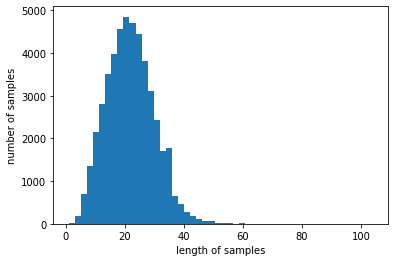

In [22]:
print('샘플의 최대 길이 : %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이 : %f' % (sum(map(len,sentences))/len(sentences)))
plt.hist([len(s) for s in sentences], bins= 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [23]:
# 정수 인코딩
src_tokenizer = Tokenizer(oov_token='OOV') # 모든 단어를 사용하지만, 인덱스 1에는 단어 'OOV'를 할당
src_tokenizer.fit_on_texts(sentences)
tar_tokenizer = Tokenizer(lower=False) # 대문자 유지
tar_tokenizer.fit_on_texts(ner_tags)

In [24]:
vocab_size = len(src_tokenizer.word_index) + 1
tag_size = len(tar_tokenizer.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('개체명 태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 31819
개체명 태깅 정보 집합의 크기 : 18


In [25]:
print('단어 OOV의 인덱스 : {}'.format(src_tokenizer.word_index['OOV']))

단어 OOV의 인덱스 : 1


In [26]:
x_data = src_tokenizer.texts_to_sequences(sentences)
y_data = tar_tokenizer.texts_to_sequences(ner_tags)

In [27]:
print(x_data[0])
print(y_data[0])

[254, 6, 967, 16, 1795, 238, 468, 7, 523, 2, 129, 5, 61, 9, 571, 2, 833, 6, 186, 90, 22, 15, 56, 3]
[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1]


In [28]:
word_to_index = src_tokenizer.word_index
index_to_word = src_tokenizer.index_word
ner_to_index = tar_tokenizer.word_index
index_to_ner = tar_tokenizer.index_word
index_to_ner[0] = 'PAD'

In [29]:
print(index_to_ner)

{1: 'O', 2: 'B-geo', 3: 'B-tim', 4: 'B-org', 5: 'I-per', 6: 'B-per', 7: 'I-org', 8: 'B-gpe', 9: 'I-geo', 10: 'I-tim', 11: 'B-art', 12: 'B-eve', 13: 'I-art', 14: 'I-eve', 15: 'B-nat', 16: 'I-gpe', 17: 'I-nat', 0: 'PAD'}


In [30]:
decoded = []
for index in x_data[0]:
  decoded.append(index_to_word[index])
print('기존의 문장:{}'.format(sentences[0]))
print('디코딩 문장 : {}'.format(decoded))

기존의 문장:['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']
디코딩 문장 : ['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']


In [31]:
max_len = 70
x_data = pad_sequences(x_data, padding='post', maxlen=max_len)
y_data = pad_sequences(y_data, padding='post', maxlen=max_len)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=.2,random_state=777)

In [33]:
#원-핫 인코딩
y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)

In [34]:
print('훈련 샘플 문장의 크기 : {}'.format(x_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(x_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (38367, 70)
훈련 샘플 레이블의 크기 : (38367, 70, 18)
테스트 샘플 문장의 크기 : (9592, 70)
테스트 샘플 레이블의 크기 : (9592, 70, 18)


### F1-Score test

In [35]:
true = ['B-PER', 'I-PER', 'O', 'O','B-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O','B-PER','I-PER', 'O', 'O', 'O', 'O', 'O', 'O','B-MISC','I-MISC','I-MISC', 'O', 'O', 'O', 'O', 'O', 'O','B-PER','I-PER', 'O', 'O', 'O', 'O', 'O']

In [36]:
# 실제값
pred = ['O'] * len(true)
print(pred)

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [37]:
hit = 0 # 정답 갯수
for t, p in zip(true, pred):
  if t == p:
    hit += 1 # 정답인 경우에만 +1

accuracy = hit/len(true)
print("정확도 : {:.1%}".format(accuracy))

정확도 : 74.4%


In [41]:
!pip install seqeval

     |████████████████████████████████| 51kB 3.2MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-cp37-none-any.whl size=16184 sha256=8df0f5b70fe02e421f7748bfb7a9b14ddd9197d88d75981de4f4c121e376a72f
  Stored in directory: /root/.cache/pip/wheels/52/df/1b/45d75646c37428f7e626214704a0e35bd3cfc32eda37e59e5f
Successfully built seqeval


In [42]:
# 정밀도(precision) 재현률 (recall)
# 정밀도 = TP / ( TP+ FP) 특정 개체라고 예측한 경우 중에서 실제 특정 개체로 판명되어 예측이 일치한 비율
# 재현률 = TP / (TP + FN) 전체 특정 개체 중에서 실제 특정 개체라고 정답을 맞춘 비율
# f1 score = 2 * (정밀도 * 재현률) / (정밀도 + 재현률)

In [38]:
from seqeval.metrics import classification_report
print(classification_report([true], [pred]))

              precision    recall  f1-score   support

        MISC       0.00      0.00      0.00         2
         PER       0.00      0.00      0.00         3

   micro avg       0.00      0.00      0.00         5
   macro avg       0.00      0.00      0.00         5
weighted avg       0.00      0.00      0.00         5



/usr/local/lib/python3.7/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
true = ['B-PER', 'I-PER', 'O', 'O', 'B-MISC', 'O','O','O','O','O','O','O','O','O','O','B-PER','I-PER','O','O','O','O','O','O','B-MISC','I-MISC','I-MISC','O','O','O','O','O','O','B-PER','I-PER','O','O','O','O','O']

In [40]:
predicted=['B-PER', 'I-PER', 'O', 'O', 'B-MISC', 'O','O','O','O','O','O','O','O','O','O','B-PER','I-PER','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O']

In [41]:
print(classification_report([true], [predicted]))

              precision    recall  f1-score   support

        MISC       1.00      0.50      0.67         2
         PER       1.00      0.67      0.80         3

   micro avg       1.00      0.60      0.75         5
   macro avg       1.00      0.58      0.73         5
weighted avg       1.00      0.60      0.75         5



### F1-score를 측정하는 콜백클래스

In [42]:
from tensorflow.keras.callbacks import Callback
from seqeval.metrics import f1_score, classification_report

In [43]:
class F1score(Callback):
  def __init__(self, value= 0.0, use_char=True):
    super(F1score, self).__init__()
    self.value = value
    self.use_char = use_char

  def sequences_to_tags(self, sequences):
    result = []
    for sequence in sequences:
      tag = []
      for pred in sequence: #시퀀스로부터 예측값을 하나 씩 꺼냄
        pred_index = np.argmax(pred) #예를들어 [0 0 1 0 0]라면 1의 인덱스인 2를 반환
        tag.append(index_to_ner[pred_index].replace("PAD", "0"))
      result.append(tag)
    return result
  
  # 에포크가 끝날 때마다 실행되는 함수
  def on_epoch_end(self, epoch, logs={}):

    # char Embedding사용하는 경우
    if self.use_char:
      x_test = self.validation_data[0]
      x_char_test = self.validation_data[1]
      y_test = self.validation_data[2]
      y_prediced = self.model.predict([x_test, x_char_test])

    else:
      x_test = self.validation_data[0]
      y_test = self.validation_data[1]
      y_prediced = self.model.predict([x_test])
    
    pred_tags = self.sequences_to_tags(y_prediced)
    test_tags = self.sequences_to_tags(y_test)

    score = f1_score(pred_tags, test_tags)
    print(' - f1: {:04.2f}'.format(score*100))
    print(classification_report(test_tags, pred_tags))

    # F1 score가 지금까지 중 가장 높은 경우
    if score > self.value:
      print('f1_score improved from %f to %f, saving model to best_model.h5' % (self.value, score))
      self.model.save('best_model.h5')
      self.value = score
    else:
      print('f1_score did not impove from %f' % (self.value))

### BILSTM + CRF 모델

![](https://wikidocs.net/images/page/34156/bilstmcrf1.PNG)

![](https://wikidocs.net/images/page/34156/bilstmcrf2_%EC%88%98%EC%A0%95.PNG)

1. 문장의 첫번째 단어에는 I가 나오지 않습니다.
2. O-I패턴은 나오지 않는다.
3. B-I-I패턴에서 개체명은 일관성을 유지합니다. 
예를들어 B-PER 다음에 I-Org는 나오지 않습니다.

In [44]:
print('훈련 샘플 문장의 크기 : {}'.format(x_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(x_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (38367, 70)
훈련 샘플 레이블의 크기 : (38367, 70, 18)
테스트 샘플 문장의 크기 : (9592, 70)
테스트 샘플 레이블의 크기 : (9592, 70, 18)


In [46]:
!pip install tensorflow==1.14.0
!pip install keras==2.2.4
!pip install tensorflow-gpu==1.14.0

  Using cached https://files.pythonhosted.org/packages/f4/28/96efba1a516cdacc2e2d6d081f699c001d414cc8ca3250e6d59ae657eb2b/tensorflow-1.14.0-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/91/2d/2ed263449a078cd9c8a9ba50ebd50123adf1f8cfbea1492f9084169b89d9/tensorboard-1.14.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3c/d5/21860a5b11caf0678fbc8319341b0ae21a07156911132e0e71bffed0510d/tensorflow_estimator-1.14.0-py2.py3-none-any.whl
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.14.0 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
 

  Using cached https://files.pythonhosted.org/packages/5e/10/aa32dad071ce52b5502266b5c659451cfd6ffcbf14e6c8c4f16c0ff5aaab/Keras-2.2.4-py2.py3-none-any.whl
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [49]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-30mn3r3o
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-30mn3r3o
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp37-none-any.whl size=101078 sha256=ef59f405bdbafb9e960996895eee7acc7830ade482bbee7408fdd5b7857712c6
  Stored in directory: /tmp/pip-ephem-wheel-cache-q4gj01l3/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [51]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from keras.models import load_model
from keras_contrib.layers import CRF
from keras_contrib.losses import crf_loss
from keras_contrib.metrics import crf_viterbi_accuracy

In [52]:
# 경고창 무시
import warnings
warnings.filterwarnings('ignore') 

In [53]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(TimeDistributed(Dense(50, activation="relu")))
crf = CRF(tag_size)
model.add(crf)

In [55]:
model.compile(optimizer="adam", loss=crf.loss_function, metrics=[crf.accuracy])
history = model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_split = 0.1, verbose = 1, callbacks=[F1score(use_char=False)])




Train on 34530 samples, validate on 3837 samples
Epoch 1/10





34530/34530 [==============================] - 336s 10ms/step - loss: 8.3135 - crf_viterbi_accuracy: 0.9100 - val_loss: 8.1139 - val_crf_viterbi_accuracy: 0.9546
 - f1: 77.63
              precision    recall  f1-score   support

         art       0.00      0.00      0.00        37
         eve       0.00      0.00      0.00        30
         geo       0.82      0.83      0.83      3087
         gpe       0.92      0.93      0.93      1146
         nat       0.00      0.00      0.00        16
         org       0.67      0.52      0.58      1691
         per       0.73      0.69      0.71      1310
         tim       0.87      0.78      0.83      1672

   micro avg       0.81      0.75      0.78      8989
   macro avg       0.50      0.47      0.48      8989
weighted avg       0.79      0.75      0.77      8989

f1_score improved from 0.000000 to 0.776254, saving model to best_model.h5
Epoch 2/10
34530/34530 [=======

In [56]:
bilstm_crf_model = load_model('best_model.h5', custom_objects={'CRF':CRF,
                                                  'crf_loss':crf_loss,
                                                  'crf_viterbi_accuracy':crf_viterbi_accuracy})

In [59]:
i=13 # 확인하고 싶은 테스트용 샘플의 인덱스.
y_predicted = bilstm_crf_model.predict(np.array([x_test[i]])) # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
y_predicted = np.argmax(y_predicted, axis=-1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
true = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(x_test[i], true, y_predicted[0]):
    if w != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[w], index_to_ner[t], index_to_ner[pred]))

단어             |실제값  |예측값
-----------------------------------
the              : O       O
statement        : O       O
came             : O       O
as               : O       O
u.n.             : B-org   B-org
secretary-general: I-org   I-org
kofi             : B-per   B-per
annan            : I-per   I-per
met              : O       O
with             : O       O
officials        : O       O
in               : O       O
amman            : B-geo   B-geo
to               : O       O
discuss          : O       O
wednesday        : B-tim   B-tim
's               : O       O
attacks          : O       O
.                : O       O


### 실제 모델에 대해서 f1 score 구하기

In [60]:
f1score = F1score(use_char=False)

y_predicted = bilstm_crf_model.predict([x_test])
pred_tags = f1score.sequences_to_tags(y_predicted)
test_tags = f1score.sequences_to_tags(y_test)

In [61]:
print(classification_report(test_tags, pred_tags))

              precision    recall  f1-score   support

         art       0.22      0.03      0.06        63
         eve       0.67      0.27      0.38        52
         geo       0.83      0.86      0.85      7620
         gpe       0.94      0.95      0.95      3145
         nat       1.00      0.16      0.28        37
         org       0.71      0.55      0.62      4033
         per       0.78      0.74      0.76      3545
         tim       0.89      0.85      0.87      4067

   micro avg       0.83      0.79      0.81     22562
   macro avg       0.76      0.55      0.60     22562
weighted avg       0.83      0.79      0.81     22562



In [62]:
print("F1-score: {:.1%}".format(f1_score(test_tags, pred_tags)))

F1-score: 81.3%


### 새로운 입력에 대해서 예측하기

In [63]:
new_sentence='Mr. Heo said South Korea has become a worldwide leader'.lower().split()

In [64]:
new_encoded=[]
for w in new_sentence:
    try:
      new_encoded.append(word_to_index.get(w,1))
    except KeyError:
      new_encoded.append(word_to_index['OOV'])
      # 모델이 모르는 단어에 대해서는 'OOV'의 인덱스인 1로 인코딩

print(new_encoded)

[38, 1, 18, 117, 243, 12, 762, 8, 1154, 130]


In [65]:
new_padded = pad_sequences([new_encoded], padding="post", value=0, maxlen=max_len)

In [66]:
p = bilstm_crf_model.predict(np.array([new_padded[0]]))
p = np.argmax(p, axis=-1)
print("{:15}||{}".format("단어", "예측값"))
print(30 * "=")
for w, pred in zip(new_sentence, p[0]):
    print("{:15}: {:5}".format(w, index_to_ner[pred]))

단어             ||예측값
mr.            : B-per
heo            : I-per
said           : O    
south          : B-geo
korea          : I-geo
has            : O    
become         : O    
a              : O    
worldwide      : O    
leader         : O    
